In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.insert(0, '../utils/')

from training_models import main_cluster

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv("../data/df.csv", index_col=0)
rj_df = pd.read_csv("../data/rj_df.csv", index_col=0)
sp_df = pd.read_csv("../data/sp_df_pot.csv", index_col=0)

In [4]:
df = pd.concat([rj_df, sp_df])

#### Segmentação Bairros

In [5]:
clustering_df = df.drop(columns=['codigo', 'nome', 'cidade', 'estado'])

Model saved to ../models/cluster_model.pickle


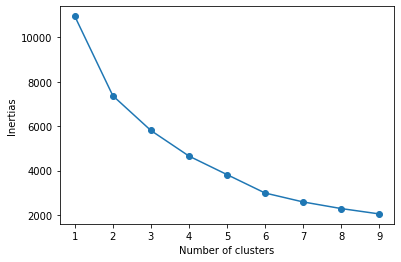

In [6]:
df, km = main_cluster(clustering_df, df, 4)

In [7]:
df['cluster'].value_counts()

0    230
1    150
2     75
3      1
Name: cluster, dtype: int64

In [9]:
df.groupby('cluster')['popAlvo', '%_popAlvo', 'domiciliosAlvo', '%_domiciliosAlvo', 'rendaMedia', 'faturamento'].mean()

popAlvo  %_popAlvo  domiciliosAlvo  %_domiciliosAlvo  rendaMedia  \
cluster                                                                      
0         8261.34       0.19         2189.85              0.34     2485.69   
1        13476.93       0.19         8049.55              0.61     6977.09   
2        39518.31       0.19         8228.99              0.23     1643.03   
3       191432.00       0.14        34373.00              0.31     1856.00   

         faturamento  
cluster               
0          798695.19  
1         1326601.91  
2          292356.83  
3           69645.00

#### Export Data

In [10]:
df.to_csv('../data/df_final.csv')